In [71]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from keras.models import Sequential,Model

from keras.layers import Dense

from keras.datasets import mnist

from keras.callbacks import LambdaCallback

In [4]:
(x_train,y_train) , (x_test,y_test) = mnist.load_data()

11490434/11490434 [==============================] - 2s 0us/step


In [12]:
def get_details(x,y):
  print(f"x shape: {x.shape}\ny shape: {y.shape}")
  #unique_x,counts_x = np.unique(x,return_counts=True)
  unique_y,counts_y = np.unique(y,return_counts=True)
  print(f"y unique: {dict(zip(unique_y, counts_y))}")

In [13]:
print("Training Set")
get_details(x_train,y_train)
print("--------------------------")
print("Test Set")
get_details(x_test,y_test)

Training Set
x shape: (60000, 28, 28)
y shape: (60000,)
y unique: {0: 5923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 6: 5918, 7: 6265, 8: 5851, 9: 5949}
--------------------------
Test Set
x shape: (10000, 28, 28)
y shape: (10000,)
y unique: {0: 980, 1: 1135, 2: 1032, 3: 1010, 4: 982, 5: 892, 6: 958, 7: 1028, 8: 974, 9: 1009}


In [28]:
x_train = x_train / 255.0
x_test = x_test / 255.0

In [29]:
x_train = x_train.reshape((60000,784))
x_test = x_test.reshape((10000,784))

In [30]:
print(f"Shape xtrain: {x_train.shape}\nShape xtest: {x_test.shape}")

Shape xtrain: (60000, 784)
Shape xtest: (10000, 784)


In [44]:
def create_autoencoders():
  model = Sequential()
  model.add(Dense(256,input_shape=(784,),name='Input_Layer'))
  model.add(Dense(128,activation='relu',name='Enc_1'))
  model.add(Dense(64,activation='relu',name='Enc_2'))
  model.add(Dense(32,activation='relu',name='Latent_Space'))

  model.add(Dense(64,activation='relu',name='Dec_1'))
  model.add(Dense(128,activation='relu',name='Dec_2'))
  model.add(Dense(784,activation='sigmoid',name='Output'))

  return model

In [45]:
model = create_autoencoders()

In [46]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input_Layer (Dense)         (None, 256)               200960    
                                                                 
 Enc_1 (Dense)               (None, 128)               32896     
                                                                 
 Enc_2 (Dense)               (None, 64)                8256      
                                                                 
 Latent_Space (Dense)        (None, 32)                2080      
                                                                 
 Dec_1 (Dense)               (None, 64)                2112      
                                                                 
 Dec_2 (Dense)               (None, 128)               8320      
                                                                 
 Output (Dense)              (None, 784)              

In [72]:
def visualize_latent_space(epoch, logs):
    # Create a new model to represent the encoder part (up to 'Latent_Space')
    encoder = Model(inputs=model.input, outputs=model.get_layer('Latent_Space').output)

    # Encode the input data to get the latent space representation
    encoded_data = encoder.predict(x_test)

    # Visualize the latent space using a scatter plot
    plt.figure(figsize=(8, 6))
    plt.scatter(encoded_data[:, 0], encoded_data[:, 1], c=y_test, cmap='jet')
    plt.colorbar()
    plt.title(f"Latent Space (Epoch {epoch + 1})")
    plt.show()

In [73]:
latent_space_callback = LambdaCallback(on_epoch_end=visualize_latent_space)

In [67]:
def visualize_image(epochs,logs):
  n = 5
  input_samples = x_test[:5]
  decoded_samples = model.predict(input_samples)

  input_samples = input_samples.reshape(-1,28,28)
  decoded_samples = decoded_samples.reshape(-1,28,28)

  plt.figure(figsize=(10,11))
  for i in range(5):
    plt.imshow(input_samples[i], cmap='gray')
    plt.title("Original")
    plt.axis('off')
    plt.show()

    plt.imshow(decoded_samples[i], cmap='gray')
    plt.title("Reconstructed")
    plt.axis('off')
    plt.show()

In [68]:
vis_callback = LambdaCallback(on_epoch_end=visualize_image)

In [74]:
model.compile(optimizer='adam',loss='binary_crossentropy')

In [75]:
history = model.fit(x_train,x_train,batch_size=256,validation_data=(x_test,x_test),epochs=10,callbacks=[latent_space_callback])

Output hidden; open in https://colab.research.google.com to view.

In [49]:
decoded_digits = model.predict(x_test)

313/313 [==============================] - 1s 3ms/step


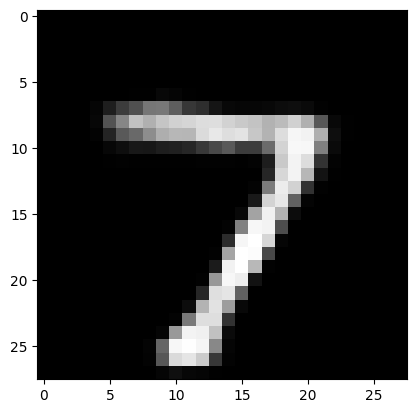

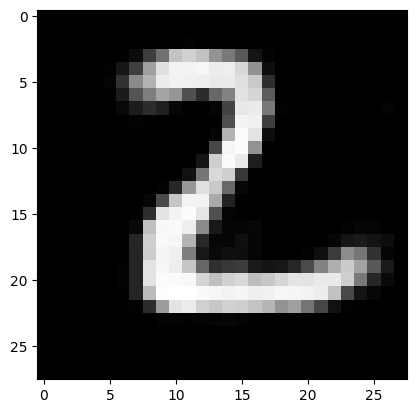

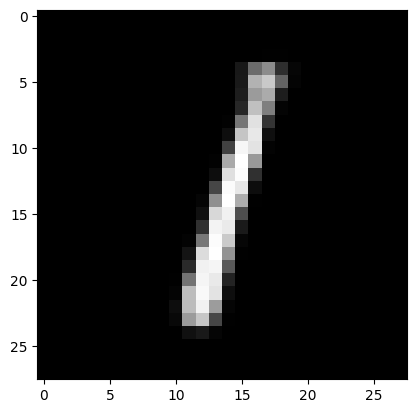

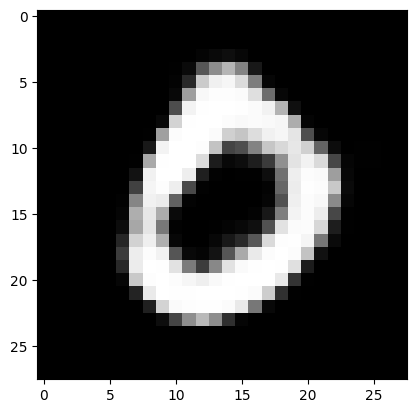

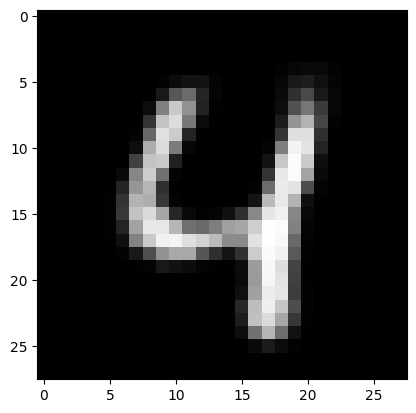

In [51]:
for i in range(5):
  img = decoded_digits[i].reshape(28,28)
  plt.imshow(img,cmap='gray')
  plt.show()

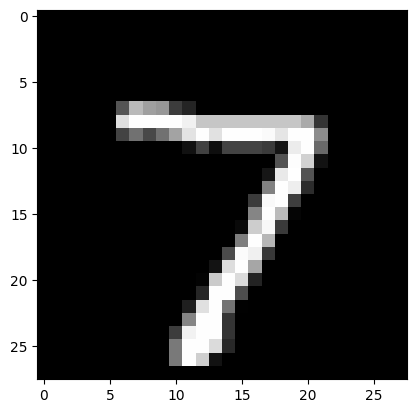

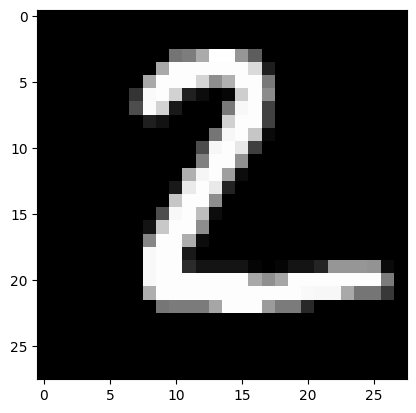

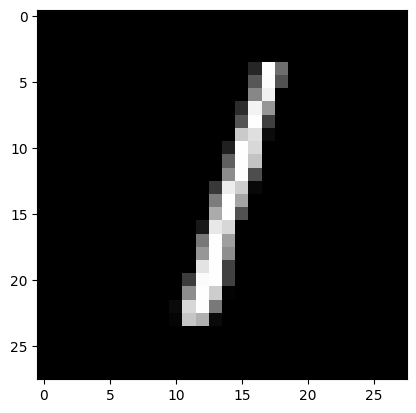

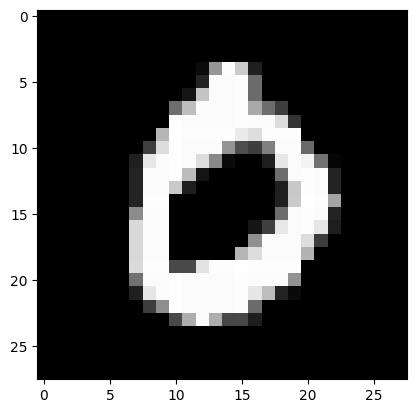

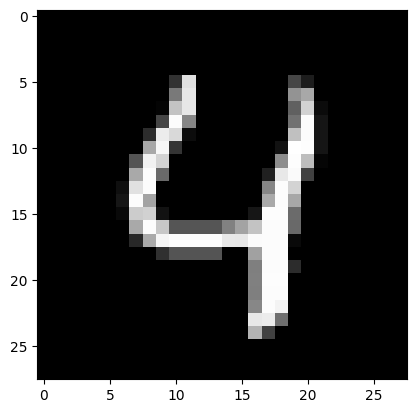

In [52]:
for i in range(5):
  img = x_test[i].reshape(28,28)
  plt.imshow(img,cmap='gray')
  plt.show()

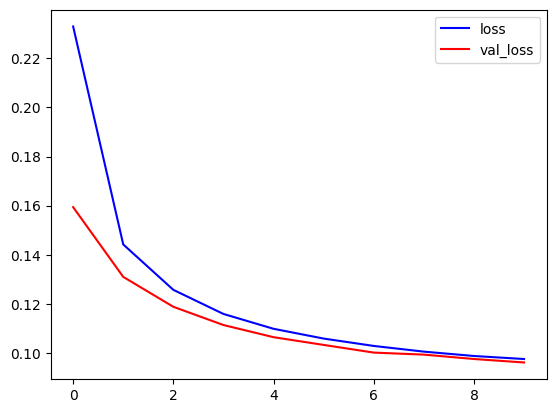

In [53]:
plt.plot(history.history['loss'],'b')
plt.plot(history.history['val_loss'],'r')
plt.legend(['loss','val_loss'])
plt.show()